# Task
 Naive Bayes algorithm in Natural Language Processing (NLP).
Dataset
The provided dataset, "blogs_categories.csv", consists of blog posts along with their associated categories. Each row represents a blog post with the following columns:
•	Text: The content of the blog post. Column name: Data
•	Category: The category to which the blog post belongs. Column name: Labels
Tasks
1. Data Exploration and Preprocessing
•	Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.
•	Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.
•	Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.
2. Naive Bayes Model for Text Classification
•	Split the data into training and test sets.
•	Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.
•	Train the model on the training set and make predictions on the test set.
3. Sentiment Analysis
•	Choose a suitable library or method for performing sentiment analysis on the blog post texts.
•	Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.
•	Examine the distribution of sentiments across different categories and summarize your findings.
4. Evaluation
•	Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.
•	Discuss the performance of the model and any challenges encountered during the classification process.
•	Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.
Submission Guidelines
•	Include a comprehensive report.

## Data loading





Load the dataset, rename columns, and display the first few rows.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('blogs.csv')
    df = df.rename(columns={'Data': 'Text', 'Labels': 'Category'})
    display(df.head())
except FileNotFoundError:
    print("Error: 'blogs.csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,Text,Category
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


## Data exploration



Explore the dataset by checking for missing values, data types, category distribution, text length distribution, and duplicates.



Missing values per column:
 Text        0
Category    0
dtype: int64

Data types per column:
 Text        object
Category    object
dtype: object

Category distribution:
 Category
alt.atheism                 100
comp.graphics               100
comp.os.ms-windows.misc     100
comp.sys.ibm.pc.hardware    100
comp.sys.mac.hardware       100
comp.windows.x              100
misc.forsale                100
rec.autos                   100
rec.motorcycles             100
rec.sport.baseball          100
rec.sport.hockey            100
sci.crypt                   100
sci.electronics             100
sci.med                     100
sci.space                   100
soc.religion.christian      100
talk.politics.guns          100
talk.politics.mideast       100
talk.politics.misc          100
talk.religion.misc          100
Name: count, dtype: int64


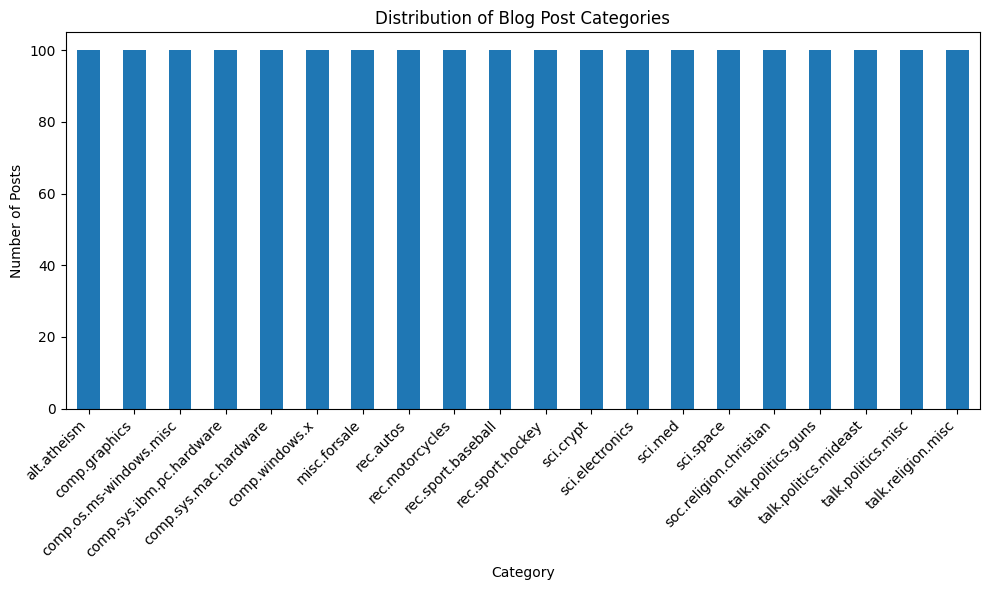


Blog post length statistics:
 count     2000.000000
mean      2324.978000
std       3590.560226
min        425.000000
25%       1147.000000
50%       1605.500000
75%       2374.500000
max      62290.000000
Name: Text_Length, dtype: float64


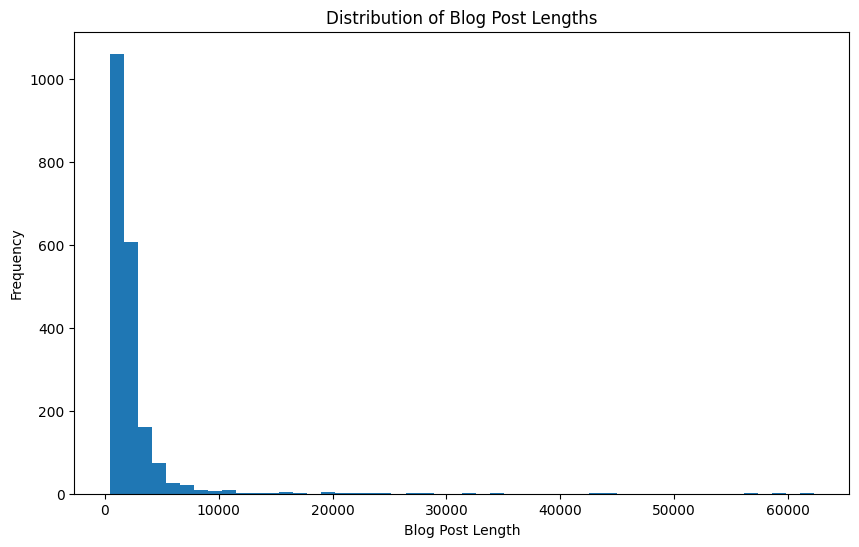


Shortest blog post:
 Text           Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....
Category                                           comp.graphics
Text_Length                                                  425
Name: 126, dtype: object

Longest blog post:
 Text           Xref: cantaloupe.srv.cs.cmu.edu comp.graphics:...
Category                                           comp.graphics
Text_Length                                                62290
Name: 134, dtype: object

Number of duplicate rows: 0


In [2]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Examine data types
print("\nData types per column:\n", df.dtypes)

# Analyze the distribution of categories
category_counts = df['Category'].value_counts()
print("\nCategory distribution:\n", category_counts)

# Plotting the category distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Distribution of Blog Post Categories')
plt.xlabel('Category')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Explore the length of blog posts
df['Text_Length'] = df['Text'].str.len()
print("\nBlog post length statistics:\n", df['Text_Length'].describe())

# Visualize the distribution of blog post lengths
plt.figure(figsize=(10, 6))
plt.hist(df['Text_Length'], bins=50)
plt.title('Distribution of Blog Post Lengths')
plt.xlabel('Blog Post Length')
plt.ylabel('Frequency')
plt.show()

# Examine shortest and longest blog posts
shortest_post = df.loc[df['Text_Length'].idxmin()]
longest_post = df.loc[df['Text_Length'].idxmax()]
print("\nShortest blog post:\n", shortest_post)
print("\nLongest blog post:\n", longest_post)

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print("\nNumber of duplicate rows:", len(duplicate_rows))
if not duplicate_rows.empty:
    display(duplicate_rows)

## Data cleaning





Clean the text data by removing punctuation, converting to lowercase, and removing stop words. Store the cleaned text in a new column 'Cleaned_Text'.



In [3]:
import string
import nltk
from nltk.corpus import stopwords

# Download required NLTK data if not already present
try:
    stop_words = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Remove stop words
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['Cleaned_Text'] = df['Text'].apply(clean_text)
display(df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Text,Category,Text_Length,Cleaned_Text
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,5972,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,1336,newsgroups altatheism path cantaloupesrvcscmue...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,3116,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,15910,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,3264,xref cantaloupesrvcscmuedu altatheism53485 tal...


## Feature engineering





Create a TfidfVectorizer object, fit and transform the 'Cleaned_Text' column, and convert the sparse matrix to a dense matrix.



In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer(max_features=5000)  # Experiment with max_features

# Fit and transform the 'Cleaned_Text' column
tfidf_matrix = vectorizer.fit_transform(df['Cleaned_Text'])

# Convert the sparse matrix to a dense matrix
tfidf_matrix_dense = tfidf_matrix.toarray()

## Data splitting




Split the data into training and testing sets using `train_test_split`.



In [5]:
from sklearn.model_selection import train_test_split

# Assuming tfidf_matrix_dense and df['Category'] are defined from previous steps
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_matrix_dense,
    df['Category'],
    test_size=0.2,
    random_state=42,
    shuffle=True,
    stratify=df['Category']
)

## Model training





Train a Multinomial Naive Bayes model using the training data.



In [6]:
from sklearn.naive_bayes import MultinomialNB

# Create and train the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

## Model evaluation




Predict on the test set and evaluate the model's performance using classification report and confusion matrix.



Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.84      0.80      0.82        20
           comp.graphics       0.81      0.85      0.83        20
 comp.os.ms-windows.misc       0.85      0.85      0.85        20
comp.sys.ibm.pc.hardware       0.54      0.70      0.61        20
   comp.sys.mac.hardware       0.82      0.70      0.76        20
          comp.windows.x       0.80      0.80      0.80        20
            misc.forsale       0.85      0.85      0.85        20
               rec.autos       0.86      0.90      0.88        20
         rec.motorcycles       0.94      0.85      0.89        20
      rec.sport.baseball       0.91      1.00      0.95        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       0.90      0.95      0.93        20
         sci.electronics       0.80      0.80      0.80        20
                 sci.med       0.93      0.70      0

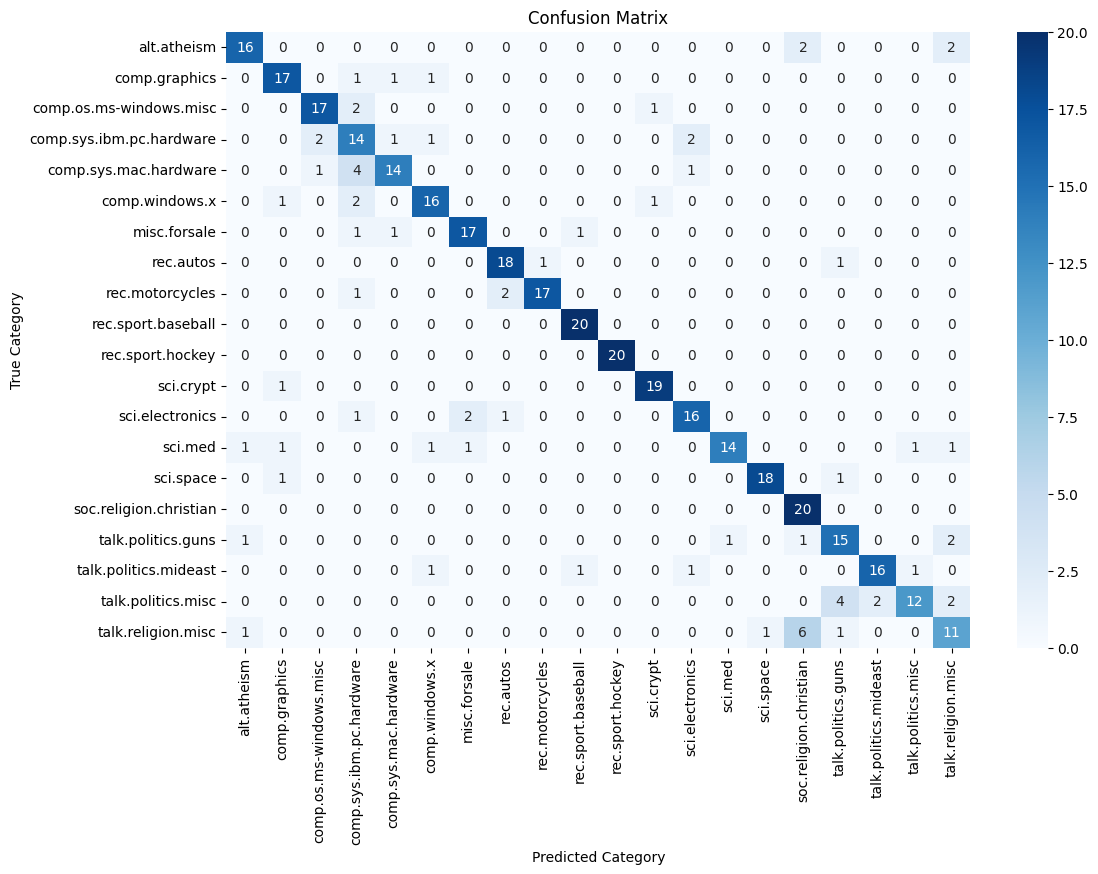

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = nb_classifier.predict(X_test)

# Calculate and print evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("\nConfusion Matrix:")
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.xlabel('Predicted Category')
plt.ylabel('True Category')
plt.title('Confusion Matrix')
plt.show()

## Data preparation




Create a new dataframe `df_sentiment` containing only the 'Text' column from the original dataframe `df`.



In [8]:
df_sentiment = df[['Text']].copy()
display(df_sentiment.head())

,Text
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...


## Data analysis




Perform sentiment analysis on the 'Text' column of df_sentiment using TextBlob and store the results in a new 'sentiment' column.



In [9]:
from textblob import TextBlob

def analyze_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0.05:
        return 'positive'
    elif polarity < -0.05:
        return 'negative'
    else:
        return 'neutral'

df_sentiment['sentiment'] = df_sentiment['Text'].apply(analyze_sentiment)
display(df_sentiment.head())

,Text,sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,positive
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,negative
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,positive
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,positive
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,positive


## Data analysis




Merge the dataframes, group by category and sentiment, count the occurrences, and then visualize the distribution using a bar chart.



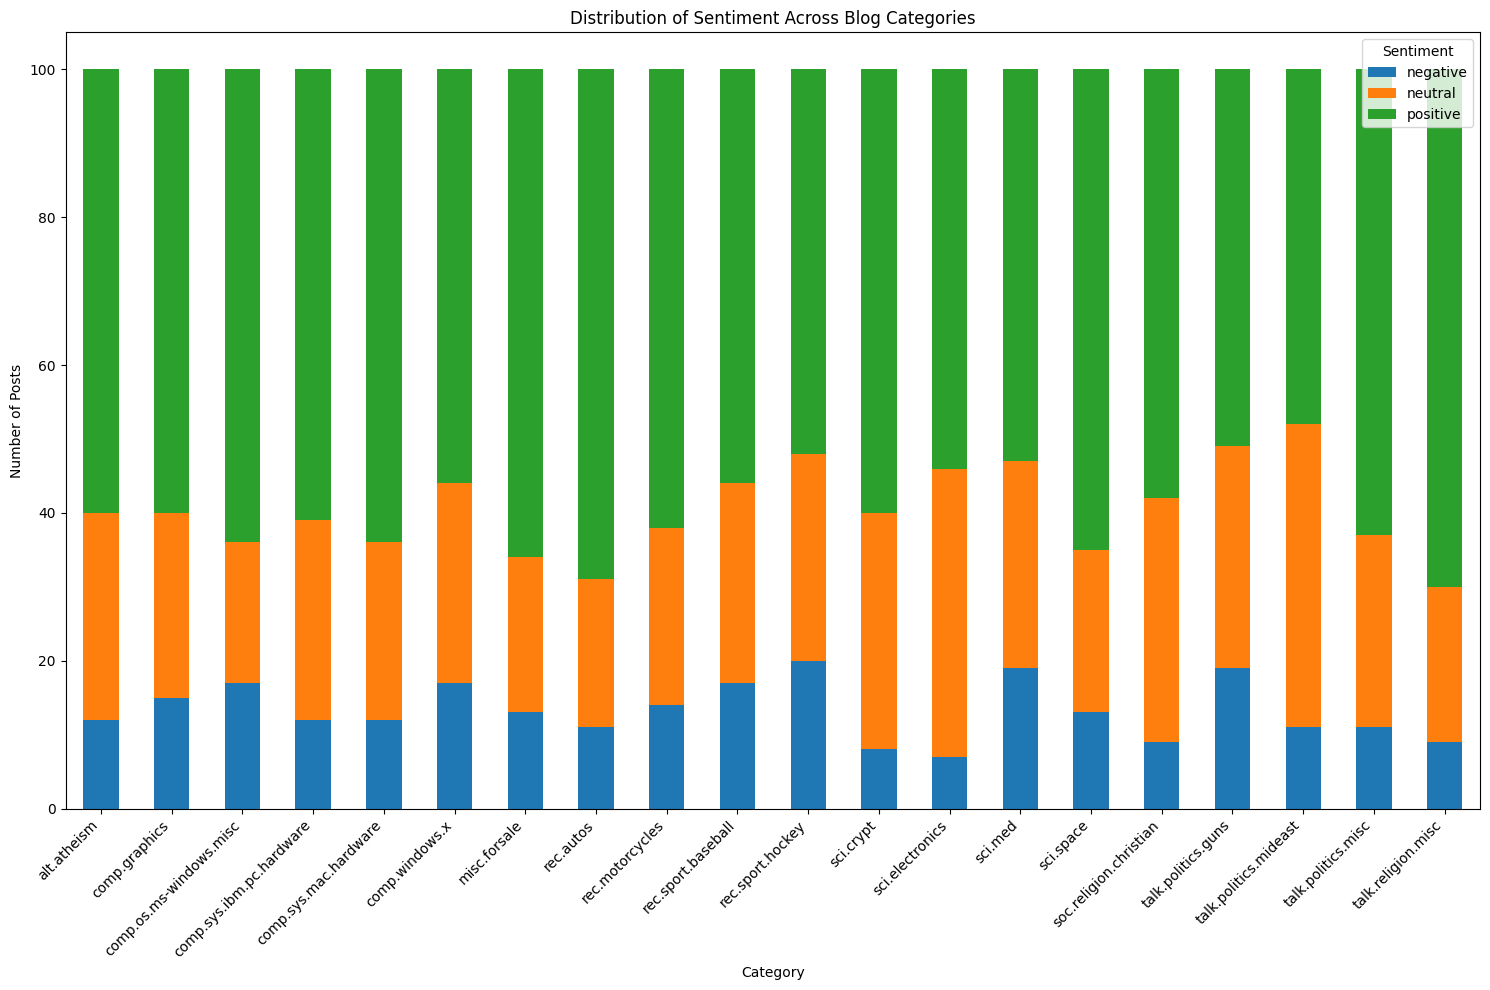

In [11]:
# Ensure df_sentiment has a matching index if needed
df_sentiment = df_sentiment.reset_index(drop=True)
df_merged = pd.merge(df, df_sentiment, left_index=True, right_index=True)

# Group by category and sentiment and count
sentiment_distribution = df_merged.groupby('Category')['sentiment'].value_counts().unstack(fill_value=0)

# Visualize the distribution
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Distribution of Sentiment Across Blog Categories')
plt.xlabel('Category')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains 20 categories, with an even distribution of 100 blog posts per category, totaling 2000 posts.
*   No missing values or duplicate rows were found in the dataset.
*   Blog post lengths vary significantly, with a mean length of approximately 2325 characters and a maximum length of 62290 characters.
*   The Naive Bayes classifier achieved an overall accuracy of 82% in categorizing blog posts.
*   The model's performance varies across categories, with some categories showing higher precision and recall than others.
*   Sentiment analysis using TextBlob classified blog posts into positive, negative, and neutral sentiments.
*   The distribution of sentiments across categories shows variation, as visualized in the stacked bar chart.

